# Import Data

In [149]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline

## Data from 2012, 2016, 2020

In [150]:
# Import Data 
train2012 = pd.read_csv("/Users/wenniehu/Desktop/IMT575/ProjectData/train2012.csv")
train2016 = pd.read_csv("/Users/wenniehu/Desktop/IMT575/ProjectData/train2016.csv")
train2020 = pd.read_csv("/Users/wenniehu/Desktop/IMT575/ProjectData/train2020.csv")
print(train2012.shape, train2016.shape, train2020.shape)

(13705, 6) (30151, 6) (56121, 7)


In [151]:
# Inspect whether raw data has NaN

print('--train2012--')
for c in train2012.columns.values:
    if np.sum(train2012[c].isna()) > 0 :
        print(c)
    else: 
        print(c, '-no NaN')
        continue
print('\n')

print('--train2016--')
for c in train2016.columns.values:
    if np.sum(train2016[c].isna()) > 0 :
        print(c)
    else: 
        print(c, '-no NaN')
        continue
print('\n')

print('--for train2020--')
for c in train2020.columns.values:
    if np.sum(train2020[c].isna()) > 0 :
        print(c)
    else: 
        print(c, '-no NaN')
        continue

--train2012--
Datetime -no NaN
Text
TweetID -no NaN
username -no NaN
geo
Party -no NaN


--train2016--
Datetime -no NaN
Text
TweetID -no NaN
username -no NaN
geo
Party -no NaN


--for train2020--
Datetime -no NaN
Text
TweetID -no NaN
username -no NaN
geo
Party -no NaN
State


In [152]:
# Create a function to clean all three data
def clean_df(df):
    
    # Remove duplicate rows in each data
    cleandf = df.drop_duplicates('TweetID', keep = 'first')
    
    # Remove NA in the text column
    cleandf = cleandf.dropna(subset = ['Text'] )
    
    # Select relevant column
    cleandf = cleandf[['Text','username','Party']]
    
    # Remove independent class in Party variable
    cleandf = cleandf[cleandf['Party'] != 'I']
    
    return(cleandf)

In [153]:
# Pre-process dataframe
data2012 = clean_df(train2012)
data2016 = clean_df(train2016)
data2020 = clean_df(train2020)

print(data2012.shape, data2016.shape, data2020.shape)

(13084, 3) (29659, 3) (55459, 3)


In [154]:
# Return the top 10 politicians who tweets most frequently in 2012
data2012.groupby('username')['Text'].count().sort_values(ascending = False).head(10)

username
BarackObama       1084
SenSanders         709
JohnCornyn         670
SenJohnMcCain      521
MikeCrapo          497
MarkUdall          496
kaybaileyhutch     437
SenBlumenthal      325
RoyBlunt           313
ChuckGrassley      298
Name: Text, dtype: int64

In [155]:
# Return the top 10 politicians who tweets most frequently in 2016
data2016.groupby('username')['Text'].count().sort_values(ascending = False).head(10)

username
HillaryClinton     2728
realDonaldTrump    1440
CoryBooker         1279
SenRickScott       1240
JohnCornyn         1188
senrobportman      1045
SenTomCotton        972
SenSanders          742
SenatorDurbin       647
SenatorBaldwin      609
Name: Text, dtype: int64

In [156]:
# Return the top 10 politicians who tweets most frequently in 2020
data2020.groupby('username')['Text'].count().sort_values(ascending = False).head(10)

username
AndrewYang         2199
realDonaldTrump    1894
JohnCornyn         1346
JoeBiden           1303
SenatorDurbin      1282
SenTedCruz         1166
SenRickScott       1126
PeteButtigieg      1034
SenSchumer         1006
senrobportman       964
Name: Text, dtype: int64

In [157]:
# Calculate number of Democratic tweets and Republican tweets for 2012, 2016 and 2020.
print('Number of Tweets by each party in 2012')
print(data2012['Party'].value_counts()/data2012.shape[0])
print('\n')

print('Number of Tweets by each party in 2016')
print(data2016['Party'].value_counts()/data2016.shape[0])
print('\n')

print('Number of Tweets by each party in 2020')
print(data2020['Party'].value_counts()/data2020.shape[0])

Number of Tweets by each party in 2012
D    0.529272
R    0.470728
Name: Party, dtype: float64


Number of Tweets by each party in 2016
R    0.510166
D    0.489834
Name: Party, dtype: float64


Number of Tweets by each party in 2020
D    0.541716
R    0.458284
Name: Party, dtype: float64


In [158]:
# Add [Year] column into each dataframe 
data2012['Year'] = int(2012)
data2016['Year'] = int(2016)
data2020['Year'] = int(2020)

# Concatenate three data in a single df
dataall = pd.concat([data2012, data2016, data2020], axis = 0, ignore_index = True)
dataall.shape

(98202, 4)

# Text Processing

In [159]:
pip install --upgrade unidecode

Requirement already up-to-date: unidecode in /Users/wenniehu/opt/anaconda3/lib/python3.7/site-packages (1.1.1)
You should consider upgrading via the '/Users/wenniehu/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [160]:
pip install --upgrade emoji

Requirement already up-to-date: emoji in /Users/wenniehu/opt/anaconda3/lib/python3.7/site-packages (0.5.4)
You should consider upgrading via the '/Users/wenniehu/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [161]:
pip install nltk

You should consider upgrading via the '/Users/wenniehu/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [162]:
# Import text processing packages

import re
from unidecode import unidecode
import emoji

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Import stop word and stemmer
stopwordslist = stopwords.words('english')
stemmer = PorterStemmer()
lemmatizer= WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wenniehu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/wenniehu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Text processing procedure
1.Remove http:// link <br>
https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk <br>
<br>
2.Convert accent character and unicode to ASCII (café to cafe)<br>
https://towardsdatascience.com/nlp-text-preprocessing-a-practical-guide-and-template-d80874676e79<br>
<br>
3a.Convert emoji to text(for sentimental analysis) <br>
https://towardsdatascience.com/twitter-sentiment-analysis-using-fasttext-9ccd04465597<br>
<br>
3b.Remove emoji entirely<br> 
https://towardsdatascience.com/extracting-twitter-data-pre-processing-and-sentiment-analysis-using-python-3-0-7192bd8b47cf<br>
<br>
4a.Remove @mention and special character<br> 
https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk<br>
4b.Replace hyphen with space<br>
https://stackoverflow.com/questions/44333462/how-do-i-replace-hyphen-with-space-in-a-string-except-for-the-matched-patter<br>
<br>
5.Expand Contractions (not using pycontractions)<br>
https://stackoverflow.com/questions/43018030/replace-apostrophe-short-words-in-python/47091370#47091370<br>
<br>
6.Remove punctuations<br>
<br>
7.Lowercase all texts<br>
<br>
8.Remove whitespace<br>
<br>
9.Replace newline and tab with space <br>
<br>
10a.Remove number<br>
https://medium.com/@datamonsters/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908<br>
<br>
10b.Convert number words to number <br>
https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089<br>
<br>
11.Remove stopword <br>
<br>
12a.Lemmatize<br>
<br>
12b.Stemming<br>

## Text Processing I - Remove Emoji

In [163]:
# Create a Text Processing Function textprocessing()

emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase) 
    # Even though "Jenny's bag" will be contracted to "Jenny is bag", 
    # "what's" can be correctly decontracted to "what is"
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def textprocessing(tweet):
    #Ensure passing value is a string
    tweet = str(tweet)
    
    # Remove embedded link
    tweet = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|''(?:%[0-9a-fA-F][0-9a-fA-F]))+','', tweet)
         
    # Convert Accented Characters and non-English to Enligh alpabet
    tweet = unidecode(tweet)
    
    # Retain emoji for sentiment analysis 
    # tweet = emoji.demojize(tweet).replace(':','')
    
    # Remove emoji entirely
    tweet = emoji_pattern.sub(r'', tweet)
    
    # Remove @mention 
    tweet = re.sub('(@[A-Za-z0-9_]+)', '', tweet)
    
    # Replace hyphen with space
    tweet = re.sub(r'-(?:(?<!\b[0-9]{4}-)|(?![0-9]{2}(?:[0-9]{2})?\b))', ' ', tweet)
    
    # Expand contraction
    tweet = decontracted(tweet)
    
    # Remove in-text punctuations
    tweet = re.sub(r'[^a-zA-Z0-9 \n]', '', tweet)
    
    # Lowercase the text and remove white spaces
    tweet = tweet.lower().strip()

    # Replace newline and tab with space 
    tweet = tweet.replace('\n', ' ').replace('\t', ' ')
    
    # Remove in-text numbers
    tweet =  re.sub(r'\d+', '', tweet)

    # Remove stopwords listed in the stopwordslist
    tweet =  ' '.join([word for word in tweet.split() if word not in stopwordslist])
    
    # Lemmatize then Stemming
    tweet = ' '.join([stemmer.stem(lemmatizer.lemmatize(word)) for word in tweet.split()])
    
    # Ensure tweet is in string format
    tweet = str(tweet)
    return(tweet)

In [164]:
dataall['Text'] = dataall['Text'].apply(lambda x: textprocessing(x))

## Text Processing II - Retain emoji

In [165]:
def textprocessing2(tweet):
    #Ensure passing value is a string
    tweet = str(tweet)
    
    # Remove embedded link
    tweet = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|''(?:%[0-9a-fA-F][0-9a-fA-F]))+','', tweet)
         
    # Convert Accented Characters and non-English to Enligh alpabet
    tweet = unidecode(tweet)
    
    # Retain emoji for sentiment analysis 
    tweet = emoji.demojize(tweet).replace(':','')
    
    # Remove emoji entirely
    # tweet = emoji_pattern.sub(r'', tweet)
    
    # Remove @mention 
    tweet = re.sub('(@[A-Za-z0-9_]+)', '', tweet)
    
    # Replace hyphen with space
    tweet = re.sub(r'-(?:(?<!\b[0-9]{4}-)|(?![0-9]{2}(?:[0-9]{2})?\b))', ' ', tweet)
    
    # Expand contraction
    tweet = decontracted(tweet)
    
    # Remove in-text punctuations
    tweet = re.sub(r'[^a-zA-Z0-9 \n]', '', tweet)
    
    # Lowercase the text and remove white spaces
    tweet = tweet.lower().strip()

    # Replace newline and tab with space 
    tweet = tweet.replace('\n', ' ').replace('\t', ' ')
    
    # Remove in-text numbers
    tweet =  re.sub(r'\d+', '', tweet)

    # Remove stopwords listed in the stopwordslist
    tweet =  ' '.join([word for word in tweet.split() if word not in stopwordslist])
    
    # Lemmatize then Stemming
    tweet = ' '.join([stemmer.stem(lemmatizer.lemmatize(word)) for word in tweet.split()])
    
    # Ensure tweet is in string format
    tweet = str(tweet)
    return(tweet)

In [166]:
dataall['Text2'] = dataall['Text'].apply(lambda x: textprocessing2(x))

# Sentiment Analysis/ Polarity Calculation

In [167]:
pip install textblob

You should consider upgrading via the '/Users/wenniehu/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [168]:
from textblob import TextBlob

In [169]:
# Calculate polarity of each tweet
# Polarity - Remove emoji 
# Polarity2 - Retain emoji 

dataall['Polarity'] = dataall['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
dataall['Polarity2'] = dataall['Text2'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(np.sum(dataall['Polarity'] != dataall['Polarity2']))

1526


In [170]:
1526/len(dataall)

0.015539398382924991

Number of tweets that change polarity by two different text processing constitue a small number of all data (less than 2%). Because the two texeprocessing methods used yield similar results in polarity, textprocessing will be used.

In [171]:
# Display the top 10 tweet with highest polarity by first textprocessing method
dataall.sort_values(by = 'Polarity', ascending = False).head(10)

,Text,username,Party,Year,Text2,Polarity,Polarity2
16496,thank awesom teacher give class best,CoryBooker,D,2016,thank awesom teacher give class best,1.0,1.0
90455,democrat best finest,realDonaldTrump,R,2020,democrat best finest,1.0,1.0
25216,wish best amp virginian compet rio openingcere...,MarkWarner,D,2016,wish best amp virginian compet rio openingcere...,1.0,1.0
20128,best luck oregonian compet rio roadtorio orego...,SenJeffMerkley,D,2016,best luck oregonian compet rio roadtorio orego...,1.0,1.0
95974,pray son south bend tonight wish best famili t...,PeteButtigieg,D,2020,pray son south bend tonight wish best famili t...,1.0,1.0
57967,get coronaviru relat text friend friend best t...,JohnCornyn,R,2020,get coronaviru relat text friend friend best t...,1.0,1.0
95960,plan provid medicar want everyon access health...,PeteButtigieg,D,2020,plan provid medicar want everyon access health...,1.0,1.0
20234,two lifesav organ team end breastcanc perfect ...,JerryMoran,R,2016,two lifesav organ team end breastcanc perfect ...,1.0,1.0
10659,continu work colleagu pa best bill possibl str...,RoyBlunt,R,2012,continu work colleagu pa best bill possibl str...,1.0,1.0
35647,freshcoast best coast doorcounti madeinwi bays...,SenatorBaldwin,D,2016,freshcoast best coast doorcounti madeinwi bays...,1.0,1.0


In [172]:
# Display the top 10 tweet with lowest polarity by first textprocessing method
dataall.sort_values(by = 'Polarity').head(10)

,Text,username,Party,Year,Text2,Polarity,Polarity2
667,histori record citizensunit decis one worst hi...,SenSanders,D,2012,histori record citizensunit deci one worst his...,-1.0,-1.0
75393,lead urg presid automat extend work author dac...,SenatorDurbin,D,2020,lead urg presid automat extend work author dac...,-1.0,-1.0
69393,trump administr remaininmexico polici affect t...,MartinHeinrich,D,2020,trump administr remaininmexico polici affect t...,-1.0,-1.0
57728,russia saudi arabia retreat u oil industri avo...,JohnCornyn,R,2020,russia saudi arabia retreat u oil industri avo...,-1.0,-1.0
57864,worst case coronaviru scienc via,JohnCornyn,R,2020,worst case coronaviru scienc via,-1.0,-1.0
52509,nation guardsman mi put risk crisi forc mi gua...,SenGaryPeters,D,2020,nation guardsman mi put risk crisi forc mi gua...,-1.0,-1.0
70232,cruel tactic creat chill environ immigr parent...,SenatorBennet,D,2020,cruel tactic creat chill environ immigr parent...,-1.0,-1.0
70272,yet anoth cruel deliber move trump administr i...,SenatorBennet,D,2020,yet anoth cruel delib move trump administr int...,-1.0,-1.0
52316,call rubber stamp absolut worst profit colleg ...,SenWarren,D,2020,call rubber stamp absolut worst profit colleg ...,-1.0,-1.0
90779,sleepi joe biden victori south carolina democr...,realDonaldTrump,R,2020,sleepi joe biden victori south carolina democr...,-1.0,-1.0


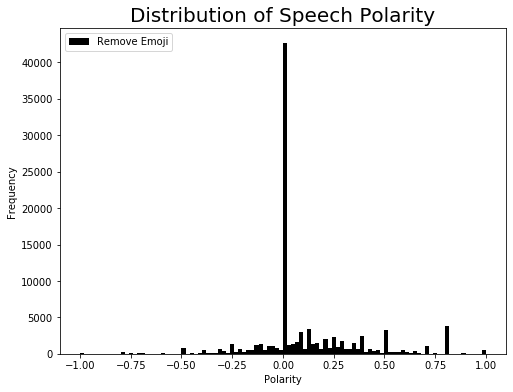

In [173]:
# Plot polarity distribution on the graph
plt.figure(figsize = (8, 6))
plt.hist(dataall['Polarity'], bins = 100, color = 'k', label = 'Remove Emoji')
plt.title('Distribution of Speech Polarity', fontsize = 20)
plt.xlabel('Polarity', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.legend(loc='upper left')
plt.show()

In [174]:
print('Number of neutral polarity tweets')
print(np.sum(dataall['Polarity'] == 0))

print('Percentage of neutral polarity tweets')
print(np.sum(dataall['Polarity'] == 0)/len(dataall))

Number of neutral polarity tweets
41952
Percentage of neutral polarity tweets
0.42720107533451457


There are exceptionally large data (43%) that has neutral polarity

In [175]:
print('Polarity Average by each year of data')
print(dataall.groupby(['Year']).mean()['Polarity'])
print('\n')

print('Polarity Average (exclude neutral tweets) by each year of data')
print(dataall[dataall['Polarity'] !=0].groupby(['Year']).mean()['Polarity'])

Polarity Average by each year of data
Year
2012    0.124717
2016    0.120693
2020    0.105518
Name: Polarity, dtype: float64


Polarity Average (exclude neutral tweets) by each year of data
Year
2012    0.257667
2016    0.258738
2020    0.162184
Name: Polarity, dtype: float64


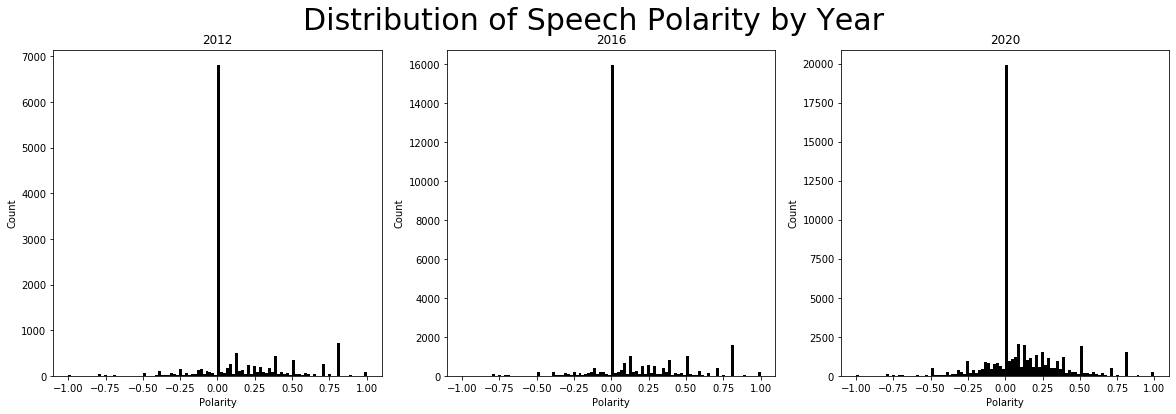

In [176]:
# Plot polarity distribution by each election year

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distribution of Speech Polarity by Year', fontsize = 30)

ax1.hist(dataall[dataall['Year'] == 2012]['Polarity'], bins = 100, color = 'k')
ax1.set_title('2012')
ax1.set(xlabel='Polarity', ylabel='Count')


ax2.hist(dataall[dataall['Year'] == 2016]['Polarity'], bins = 100, color = 'k')
ax2.set_title('2016')
ax2.set(xlabel='Polarity', ylabel='Count')


ax3.hist(dataall[dataall['Year'] == 2020]['Polarity'], bins = 100, color = 'k')
ax3.set_title('2020')
ax3.set(xlabel='Polarity', ylabel='Count')

plt.show()

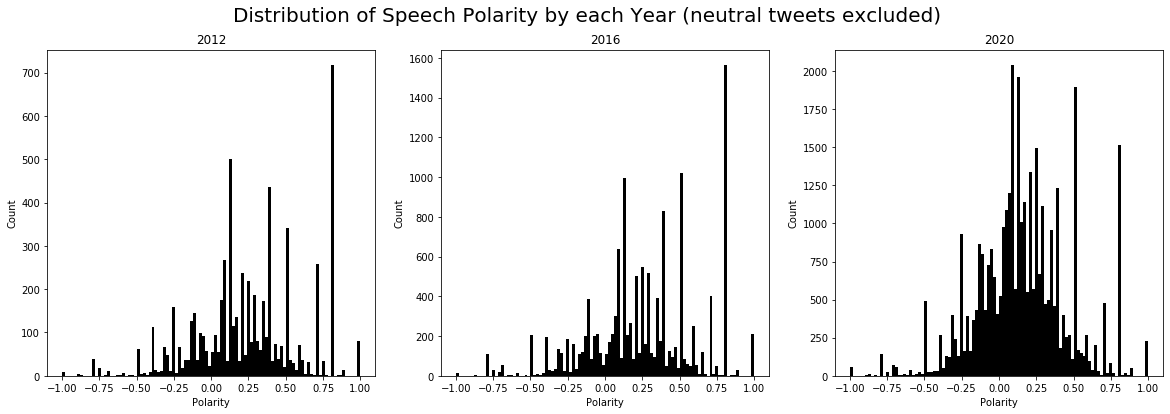

In [177]:
# Plot polarity distribution (exclude neutral tweets) by each election year

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distribution of Speech Polarity by each Year (neutral tweets excluded)', fontsize = 20)

ax1.hist(dataall[(dataall['Year'] == 2012) & (dataall['Polarity'] != 0)]['Polarity'], 
         bins = 100, color = 'k')
ax1.set_title('2012')
ax1.set(xlabel='Polarity', ylabel='Count')

ax2.hist(dataall[(dataall['Year'] == 2016) & (dataall['Polarity'] != 0)]['Polarity'], 
         bins = 100, color = 'k')
ax2.set_title('2016')
ax2.set(xlabel='Polarity', ylabel='Count')

ax3.hist(dataall[(dataall['Year'] == 2020) & (dataall['Polarity'] != 0)]['Polarity'], 
         bins = 100, color = 'k')
ax3.set_title('2020')
ax3.set(xlabel='Polarity', ylabel='Count')

plt.show()

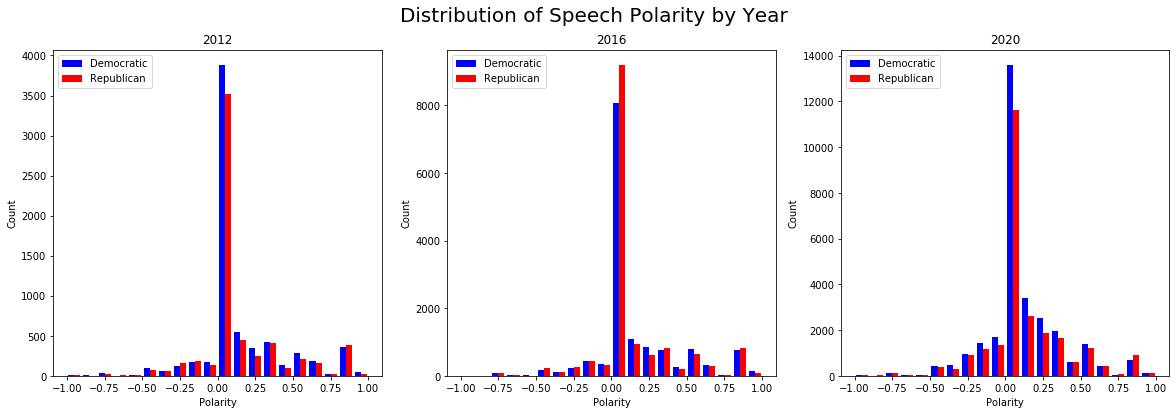

In [178]:
# Plot polarity distribution by different party by each election year

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))
fig.suptitle('Distribution of Speech Polarity by Year', fontsize = 20)

ax1.hist([dataall[(dataall['Year'] == 2012) & (dataall['Party']=='D')]['Polarity'],
          dataall[(dataall['Year'] == 2012)& (dataall['Party']=='R')]['Polarity']],
         bins = 20, color = ['b', 'r'], label = ['Democratic','Republican'])
ax1.set_title('2012')
ax1.set(xlabel='Polarity', ylabel='Count')
ax1.legend(loc='upper left')

ax2.hist([dataall[(dataall['Year'] == 2016) & (dataall['Party']=='D')]['Polarity'],
          dataall[(dataall['Year'] == 2016)& (dataall['Party']=='R')]['Polarity']], 
         bins = 20, color = ['b', 'r'], label = ['Democratic','Republican'])
ax2.set_title('2016')
ax2.set(xlabel='Polarity', ylabel='Count')
ax2.legend(loc='upper left')

ax3.hist([dataall[(dataall['Year'] == 2020) & (dataall['Party']=='D')]['Polarity'],
          dataall[(dataall['Year'] == 2020)& (dataall['Party']=='R')]['Polarity']], 
         bins = 20, color = ['b', 'r'], label = ['Democratic','Republican'])
ax3.set_title('2020')
ax3.set(xlabel='Polarity', ylabel='Count')
ax3.legend(loc='upper left')

plt.show()

# Tokenization

In [179]:
# Separate text out in the dataframe
data_text = dataall['Text']

# Set the index for each year
ind2012 = dataall[dataall['Year'] == 2012].index.values
ind2016 = dataall[dataall['Year'] == 2016].index.values
ind2020 = dataall[dataall['Year'] == 2020].index.values

In [180]:
# Import tokenization libraries and packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [181]:
# Create a function that yield the number of words from count vectorizer
def vectorized_matrix_size(data, ngram = (1,1), mindf = 1, maxdf = 1.0):
    vec = CountVectorizer(ngram_range = ngram, min_df = mindf , max_df = maxdf).fit(data)
    return(len(vec.get_feature_names()))

In [182]:
mtx = [vectorized_matrix_size(data_text, n, m) for n in [(1,1),(2,2),(1,2)] for m in (range(1,11))]
ngram_df = pd.DataFrame(np.array(mtx).reshape(3,10), 
                        columns = ['min_df = ' + str(i) for i in range(1,11)],
                        index = ['unigram', 'bigram', 'unigram+bigram'])
ngram_df

,min_df = 1,min_df = 2,min_df = 3,min_df = 4,min_df = 5,min_df = 6,min_df = 7,min_df = 8,min_df = 9,min_df = 10
unigram,34749,18684,14279,11969,10541,9465,8722,8149,7634,7207
bigram,600109,157005,82369,53774,39095,30175,24363,20254,17162,14857
unigram+bigram,634858,175689,96648,65743,49636,39640,33085,28403,24796,22064


In [183]:
# Tokenize and set the minimum of word frequency to appear in at least 10 tweets
vec = CountVectorizer(min_df = 10)
vec.fit(data_text)
vec_counts = vec.transform(data_text)

# Use matrix form for computational efficiency
vec_mx = vec_counts.toarray()

# Create a vectorized and transformed training dataframe
vec_df = pd.DataFrame(vec_mx, columns = vec.get_feature_names())
print(vec_df.shape)

(98202, 7207)


In [184]:
# Display top 30 frequent word tweeted across three election year
np.sum(vec_df, axis = 0).sort_values(ascending=False).head(30).index.values

array(['amp', 'need', 'help', 'work', 'today', 'american', 'senat',
       'thank', 'health', 'covid', 'trump', 'presid', 'state', 'get',
       'make', 'peopl', 'time', 'famili', 'support', 'coronaviru', 'care',
       'protect', 'great', 'must', 'nation', 'commun', 'new', 'act',
       'busi', 'day'], dtype=object)

The top frequently used words in the training data by appearance. The stemmed word is counted by the number of times it appears in the training data as opposed to sum of binary response which disregard the number of occurence in each tweet (if it appears in the document then the count is 1 regardless of how many occurence). 

In [185]:
# Display top 30 frequent word tweeted in 2012
np.sum(vec_df.iloc[ind2012], axis = 0).sort_values(ascending=False).head(30).index.values

array(['amp', 'today', 'obama', 'job', 'senat', 'presid', 'great',
       'thank', 'help', 'sen', 'need', 'work', 'tax', 'day', 'new',
       'american', 'vote', 'get', 'bill', 'join', 'make', 'year',
       'support', 'go', 'rt', 'famili', 'nation', 'would', 'good', 'must'],
      dtype=object)

In [186]:
# Display top 30 frequent word tweeted in 2016
np.sum(vec_df.iloc[ind2016], axis = 0).sort_values(ascending=False).head(30).index.values

array(['amp', 'today', 'thank', 'help', 'great', 'work', 'famili', 'join',
       'hillari', 'american', 'need', 'make', 'new', 'trump', 'senat',
       'day', 'year', 'peopl', 'state', 'time', 'must', 'nation', 'bill',
       'support', 'proud', 'get', 'commun', 'honor', 'see', 'offic'],
      dtype=object)

In [187]:
# Display top 30 frequent word tweeted in 2020
np.sum(vec_df.iloc[ind2020], axis = 0).sort_values(ascending=False).head(30).index.values

array(['need', 'amp', 'work', 'help', 'american', 'covid', 'health',
       'coronaviru', 'today', 'trump', 'senat', 'care', 'state', 'get',
       'presid', 'peopl', 'protect', 'thank', 'time', 'support', 'make',
       'famili', 'busi', 'commun', 'must', 'nation', 'worker', 'act',
       'provid', 'continu'], dtype=object)

## Bigram Tokenization & Analysis

In [188]:
# Tokenize and set the minimum of word frequency to appear in at least 10 tweets
vec_bigram = CountVectorizer(ngram_range = (2,2) , min_df = 10)
vec_counts_bigram = vec_bigram.fit_transform(data_text)

# Use matrix form for computational efficiency
vec_mx_bigram = vec_counts_bigram.toarray()

# Create a vectorized and transformed training dataframe
vecdf_bigram = pd.DataFrame(vec_mx_bigram, columns = vec_bigram.get_feature_names())
print(vecdf_bigram.shape)

(98202, 14857)


In [189]:
# Calculate top 30 frequent bi-gram word tweeted
np.sum(vecdf_bigram, axis = 0).sort_values(ascending=False).head(30).index.values

array(['health care', 'small busi', 'presid trump', 'make sure',
       'public health', 'donald trump', 'american peopl', 'look forward',
       'care act', 'across countri', 'unit state', 'trump administr',
       'presid obama', 'everi day', 'last night', 'coronaviru pandem',
       'covid pandem', 'front line', 'white hous', 'town hall',
       'work togeth', 'year ago', 'happi birthday', 'senat floor',
       'continu work', 'law enforc', 'last week', 'love one', 'men woman',
       'nation secur'], dtype=object)

In [190]:
# Calculate top 30 frequent bi-gram word tweeted in 2012
np.sum(vecdf_bigram.iloc[ind2012], axis = 0).sort_values(ascending=False).head(30).index.values

array(['presid obama', 'sen sander', 'look forward', 'small busi',
       'berni sander', 'sen berni', 'last night', 'senat floor',
       'middl class', 'must read', 'today news', 'watch live', 'news sen',
       'sander vt', 'vt vermont', 'health care', 'good luck', 'creat job',
       'op ed', 'senat inouy', 'town hall', 'pre obama', 'would like',
       'disclos act', 'vermont vt', 'thought prayer', 'discu issu',
       'feel free', 'mitt romney', 'staff thank'], dtype=object)

In [191]:
# Calculate top 30 frequent bi-gram word tweeted in 2016
np.sum(vecdf_bigram.iloc[ind2016], axis = 0).sort_values(ascending=False).head(30).index.values

array(['donald trump', 'happi birthday', 'hillari clinton', 'mobil offic',
       'last night', 'make sure', 'law enforc', 'look forward',
       'health care', 'op ed', 'presid obama', 'american peopl',
       'great meet', 'unit state', 'obama admin', 'crook hillari',
       'senat floor', 'year ago', 'watch live', 'small busi', 'hard work',
       'everi day', 'work togeth', 'last week', 'hurrican matthew',
       'great see', 'happi th', 'good luck', 'men woman', 'climat chang'],
      dtype=object)

In [192]:
# Calculate top 30 frequent bi-gram word tweeted in 2020
np.sum(vecdf_bigram.iloc[ind2020], axis = 0).sort_values(ascending=False).head(30).index.values

array(['health care', 'small busi', 'presid trump', 'public health',
       'make sure', 'american peopl', 'care act', 'across countri',
       'donald trump', 'trump administr', 'look forward',
       'coronaviru pandem', 'covid pandem', 'front line', 'unit state',
       'everi day', 'white hous', 'care worker', 'town hall',
       'continu work', 'social distanc', 'relief packag', 'work togeth',
       'health crisi', 'love one', 'state local', 'impeach trial',
       'stay home', 'save life', 'last week'], dtype=object)

### Subsetting entire data 

# Pre-run model evaluation code on a smaller subset of the data
np.random.seed(123)
subind= np.random.choice(len(train), 1000, replace = False)
train = train_mx[subind]
train_label = train_label.iloc[subind]

# Model Fitting and Selection 
Choose model between: Logistic Regression, SVM, and Naive Bayes.

In [193]:
# Import model fitting libraries and packages

from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Set 5-fold cross_validation
stratifiedcv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123)

## Logistic Regression

In [194]:
# Logistic Regression
logreg_mod = LogisticRegression(solver = 'lbfgs', max_iter = 200)
cv_score = cross_val_score(logreg_mod, train, train_label, cv=stratifiedcv, scoring = 'accuracy')
logreg_acc = np.mean(cv_score)
print('Logistic Regression Average Accuracy', logreg_acc)

Logistic Regression Average Accuracy 0.8072197800748176


## SVM

In [195]:
# SVM 
svm_mod = LinearSVC(random_state = 123)
cv_score = cross_val_score(svm_mod, train, train_label, cv=stratifiedcv, scoring = 'accuracy')
svm_acc = np.mean(cv_score)
print('SVM Average Accuracy', svm_acc)

SVM Average Accuracy 0.7988675401616916


## Naive Bayes 

In [196]:
# Naive Bayes
nb_mod = MultinomialNB()
cv_score = cross_val_score(nb_mod, train, train_label, cv=stratifiedcv, scoring = 'accuracy')
nb_acc = np.mean(cv_score)
print('Naive Bayes Average Accuracy', nb_acc)

Naive Bayes Average Accuracy 0.8022600043034147


# Model comparisons

In [197]:
pd.DataFrame({'Model Name': ['Logistic Regression', 'Suppor Vector Machine', 'Naive Bayes'], 
              'Accuracy': [logreg_acc, svm_acc, nb_acc]})

,Model Name,Accuracy
0,Logistic Regression,0.807220
1,Suppor Vector Machine,0.798868
2,Naive Bayes,0.802260


# Assign training and test data label

In [198]:
# Assign 2012 and 2016 as training data

train = vec_mx[np.concatenate([ind2012, ind2016])]
train_label = dataall.iloc[np.concatenate([ind2012, ind2016])].Party
print(train.shape, train_label.shape)

# Assign 2020 as test data
test = vec_mx[ind2020]
test_label = dataall.iloc[ind2020].Party
print(test.shape, test_label.shape)

(42743, 7207) (42743,)
(55459, 7207) (55459,)


From the above table, we learn that all three models yield similar accuracy. We pick the Naive Bayes model over the other two because it's a more computationally efficient.

# Model Prediction on Test Data

In [199]:
nb_mod = MultinomialNB()
nb_mod.fit(train, train_label)
pre = nb_mod.predict(test)
acc_score = metrics.accuracy_score(test_label, pre)

In [201]:
acc_score

0.6715772011756432

# Topic Modeling by LDA

[Reference] https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/#7createthedocumentwordmatrix
<br>
[Reference] https://stackoverflow.com/questions/45658014/how-to-interpret-sklearn-lda-perplexity-score-why-it-always-increase-as-number

In [202]:
# Import LDA libraries and packages
from sklearn.decomposition import LatentDirichletAllocation as LDA
import pyLDAvis
from pyLDAvis import sklearn

In [207]:
# Create individual vectorized matrix for each year 2012, 2016, 2020

# 2012
mx2012 = vec_mx[ind2012]
print(mx2012.shape)

# 2016 
mx2016 = vec_mx[ind2016]
print(mx2016.shape)

# 2020 
mx2020 = vec_mx[ind2020]
print(mx2020.shape)

(13084, 7207)
(29659, 7207)
(55459, 7207)


In [216]:
# Set LDA n_components with an array of values
lda_n_comp_arr = np.arange(3, 21, 3)

## Topic Number Optimization for 2012

In [ ]:
# Log Likelyhood: Higher the better
# Perplexity: Lower the better.

In [233]:
# Find optimal topic in 2012 data
log2012 = []
perp2012 = []

for n in lda_n_comp_arr:
    lda_mod = LDA(n_components = n, random_state = 123)
    lda_mod.fit(mx2012)
    lda_out = lda_mod.transform(mx2012)
    log2012.append(lda_mod.score(mx2012)) 
    perp2012.append(lda_mod.perplexity(mx2012))

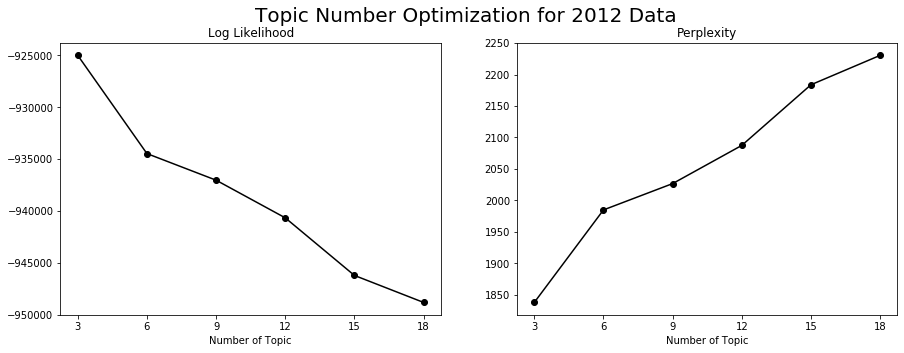

In [238]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 5))
fig.suptitle('Topic Number Optimization for 2012 Data', fontsize= 20)

ax1.plot(lda_n_comp_arr, log2012, 'o-k')
ax1.set_title('Log Likelihood')
ax1.set(xlabel = 'Number of Topic')
ax1.set_xticks(lda_n_comp_arr)

ax2.plot(lda_n_comp_arr, perp2012, 'o-k')
ax2.set_title('Perplexity')
ax2.set(xlabel = 'Number of Topic')
ax2.set_xticks(lda_n_comp_arr)

plt.show()

Because we know the higher the Log Likelihood and the lower the perplexity, the better the LDA model is, the optimal topic number for 2012 data is 3.

## Topic Number Optimization for 2016

In [224]:
# Find optimal topic in 2016 data
log2016 = []
perp2016 = []

for n in lda_n_comp_arr:
    lda_mod = LDA(n_components = n, random_state = 123)
    lda_mod.fit(mx2016)
    lda_out = lda_mod.transform(mx2016)
    log2016.append(lda_mod.score(mx2016)) # Log Likelyhood: Higher the better
    perp2016.append(lda_mod.perplexity(mx2016)) # Perplexity: Lower the better.

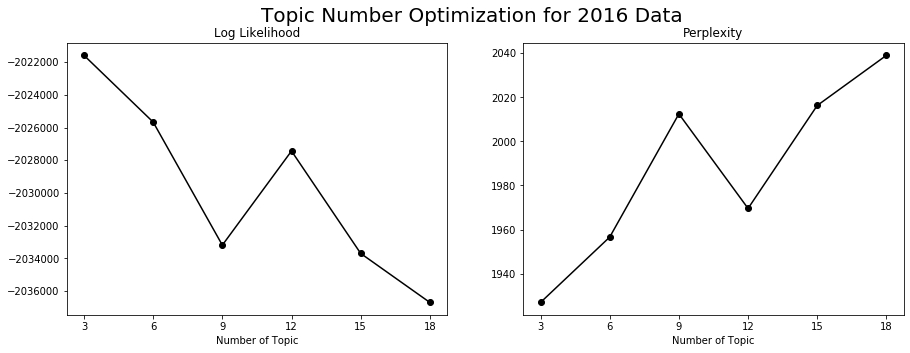

In [230]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 5))
fig.suptitle('Topic Number Optimization for 2016 Data', fontsize= 20)

ax1.plot(lda_n_comp_arr, log2016, 'o-k')
ax1.set_title('Log Likelihood')
ax1.set(xlabel = 'Number of Topic')
ax1.set_xticks(lda_n_comp_arr)

ax2.plot(lda_n_comp_arr, perp2016, 'o-k')
ax2.set_title('Perplexity')
ax2.set(xlabel = 'Number of Topic')
ax2.set_xticks(lda_n_comp_arr)

plt.show()

Because we know the higher the Log Likelihood and the lower the perplexity, the better the LDA model is, the optimal topic number for 2016 data is 3 as well.

## Topic Number Optimization for 2020

In [226]:
# Find optimal topic in 2020 data
log2020 = []
perp2020 = []

for n in lda_n_comp_arr:
    lda_mod = LDA(n_components = n, random_state = 123)
    lda_mod.fit(mx2020)
    lda_out = lda_mod.transform(mx2020)
    log2020.append(lda_mod.score(mx2020)) # Log Likelyhood: Higher the better
    perp2020.append(lda_mod.perplexity(mx2020)) # Perplexity: Lower the better.

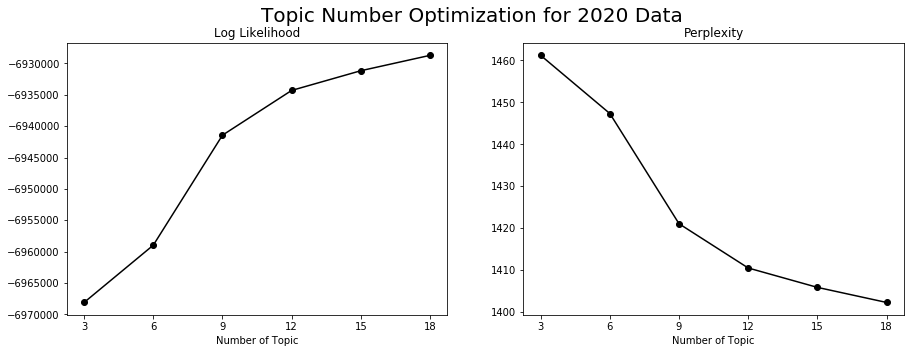

In [231]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 5))
fig.suptitle('Topic Number Optimization for 2020 Data', fontsize= 20)

ax1.plot(lda_n_comp_arr, log2020, 'o-k')
ax1.set_title('Log Likelihood')
ax1.set(xlabel = 'Number of Topic')
ax1.set_xticks(lda_n_comp_arr)

ax2.plot(lda_n_comp_arr, perp2020, 'o-k')
ax2.set_title('Perplexity')
ax2.set(xlabel = 'Number of Topic')
ax2.set_xticks(lda_n_comp_arr)

plt.show()

Because we know the higher the Log Likelihood and the lower the perplexity, the better the LDA model is, the optimal topic number for 2020 data is 18.

In [240]:
print('The optimal topic number for 2012 data is: ',lda_n_comp_arr[log2012.index(max(log2012))])
print('The optimal topic number for 2016 data is: ',lda_n_comp_arr[log2016.index(max(log2016))])
print('The optimal topic number for 2020 data is: ',lda_n_comp_arr[log2020.index(max(log2020))])
print('\n')
print('The optimal topic number for 2012 data is: ',lda_n_comp_arr[perp2012.index(min(perp2012))])
print('The optimal topic number for 2016 data is: ',lda_n_comp_arr[perp2016.index(min(perp2016))])
print('The optimal topic number for 2020 data is: ',lda_n_comp_arr[perp2020.index(min(perp2020))])

The optimal topic number for 2012 data is:  3
The optimal topic number for 2016 data is:  3
The optimal topic number for 2020 data is:  18


The optimal topic number for 2012 data is:  3
The optimal topic number for 2016 data is:  3
The optimal topic number for 2020 data is:  18


In [ ]:
pd.DataFrame({'Log Likelihood': loglik, 'Perplexity': perp}, 
             index = ['n_comp = '+str(i) for i in lda_n_comp])

In [241]:
# Define a function that can display top n keywords for each topic
def topic_keywords(vectorizer=vec, lda_model=lda_mod, n_words=20):
    keywords = np.array(vec.get_feature_names())
    topic_keywords_list = []
    for topic_weights in lda_model.components_:
        top_keyword_ind = (-topic_weights).argsort()[:n_words]
        topic_keywords_list.append(keywords.take(top_keyword_ind))
    df = pd.DataFrame(topic_keywords_list, 
                      columns = ['Word '+str(i) for i in range(n_words)], 
                      index = ['Topic '+str(i) for i in range(len(topic_keywords_list))])   
    return df

## Display the top 20 words in each topic by each data

### 2012

In [247]:
# Fit/Transform the best LDA model for 2012
lda_mod2012 = LDA(n_components = lda_n_comp_arr[log2012.index(max(log2012))], random_state = 123)
lda_out2012 = lda_mod2012.fit_transform(mx2012)
print(lda_out2012.shape)

# Find the top 20 words in each topic 
keyword_df2012 = topic_keywords(vec, lda_mod2012, n_words = 20)
keyword_df2012

(13084, 3)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,amp,obama,sen,presid,job,today,need,senat,talk,join,watch,live,vt,sander,news,bill,act,economi,energi,busi
Topic 1,tax,senat,would,new,amp,job,budget,read,cut,must,health,help,romney,call,today,million,american,offic,plan,report
Topic 2,great,today,day,thank,make,go,honor,proud,year,congrat,amp,good,vote,th,presid,famili,obama,win,work,happi


### 2016

In [248]:
# Fit/Transform the best LDA model for 2012
lda_mod2016 = LDA(n_components = lda_n_comp_arr[log2016.index(max(log2016))], random_state = 123)
lda_out2016 = lda_mod2016.fit_transform(mx2016)
print(lda_out2016.shape)

# Find the top 20 words in each topic 
keyword_df2016 = topic_keywords(vec, lda_mod2016, n_words = 20)
keyword_df2016

(29659, 3)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,amp,work,hillari,trump,american,make,help,need,peopl,famili,happi,america,protect,woman,support,job,countri,bill,right,must
Topic 1,amp,senat,help,new,fund,stop,today,zika,offic,via,join,counti,read,staff,state,obama,call,must,drug,feder
Topic 2,thank,great,today,honor,visit,meet,join,de,year,famili,amp,morn,servic,see,congrat,florida,day,enjoy,last,commun


### 2020

In [256]:
# Fit/Transform the best LDA model for 2012
lda_mod2020 = LDA(n_components = lda_n_comp_arr[log2020.index(max(log2020))], random_state = 123)
lda_out2020 = lda_mod2020.fit_transform(mx2020)
print(lda_out2020.shape)

# Find the top 20 words in each topic 
keyword_df2020 = topic_keywords(vec, lda_mod2020, n_words = 20)
keyword_df2020

(55459, 18)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,busi,small,need,help,relief,provid,worker,fund,support,covid,amp,program,famili,loan,act,bill,rural,care,work,senat
Topic 1,drug,cost,act,american,compani,price,bill,climat,would,legisl,fund,introduc,water,feder,law,must,year,bipartisan,lower,air
Topic 2,thank,child,disast,west,receiv,payment,appli,today,school,program,virginia,file,applic,tax,impact,assist,inform,approv,april,learn
Topic 3,servic,nation,serv,woman,famili,senat,honor,life,thank,day,men,pass,veteran,gun,american,today,law,year,countri,member
Topic 4,health,care,covid,coronaviru,need,public,spread,crisi,must,test,pandem,protect,amp,access,take,american,work,home,life,safe
Topic 5,investig,right,human,amp,report,call,presid,releas,gener,polit,dr,russia,news,fake,corrupt,committe,account,sen,offici,peopl
Topic 6,de,la,el,lo,en,para,que,rubio,su,ed,del,op,al,por,un,con,puerto,ma,rico,sobr
Topic 7,china,join,live,coronaviru,watch,discu,tune,chines,pm,covid,question,communist,listen,town,hall,world,pandem,today,global,talk
Topic 8,new,help,student,school,offic,learn,find,educ,state,visit,pleas,work,teacher,donat,challeng,covid,resourc,home,team,connect
Topic 9,coronaviru,state,covid,feder,amp,fund,help,resourc,local,need,receiv,govern,ensur,respons,inform,support,provid,work,pandem,commun


## Assign each topic to original dataframe 

### 2012

In [251]:
final2012 = dataall.iloc[ind2012][['Text', 'username','Party','Polarity']]
final2012['Topic'] = list(np.argmax(lda_out2012, axis = 1))
final2012.head()

,Text,username,Party,Polarity,Topic
0,californian pleas join take strong stand human...,BarbaraBoxer,D,0.433333,0
1,vote ye prop consum right know food,BarbaraBoxer,D,0.285714,0
2,let vote school kid commun vote,BarbaraBoxer,D,0.000000,2
3,prop sham brought u special interest vote,BarbaraBoxer,D,0.078571,2
4,romney ship load job china peddl load lie ohio...,BarbaraBoxer,D,0.000000,0


### 2016

In [257]:
final2016 = dataall.iloc[ind2016][['Text', 'username','Party','Polarity']]
final2016['Topic'] = list(np.argmax(lda_out2016, axis = 1))
final2016.head()

,Text,username,Party,Polarity,Topic
13084,per constitut pen phone theori govern,SenSasse,R,0.000,1
13085,senior member congress go execut branch ask le...,SenSasse,R,0.700,0
13086,peopl know basi govern rule limit govern freed...,SenSasse,R,0.000,0
13087,spin solv time white hous admit obamacar work,SenSasse,R,0.000,0
13088,safe space movement colleg campu understand fi...,SenSasse,R,0.375,0


### 2020

In [258]:
final2020 = dataall.iloc[ind2020][['Text', 'username','Party','Polarity']]
final2020['Topic'] = list(np.argmax(lda_out2020, axis = 1))
final2020.head()

,Text,username,Party,Polarity,Topic
42743,memori day honor whose spirit duti never waver...,SenAmyKlobuchar,D,0.000000,3
42744,sen klobuchar join introduc legisl creat new j...,SenAmyKlobuchar,D,0.136364,16
42745,time mani farmer rural commun feel disproporti...,SenAmyKlobuchar,D,0.216667,14
42746,sen ami klobuchar jerri moran introduc biparti...,SenAmyKlobuchar,D,0.000000,1
42747,today mental health awar month senat klobuchar...,SenAmyKlobuchar,D,-0.100000,3


In [254]:
def summary_df(keyword_df, final):

    # Create a reporting dataframe
    report_df = keyword_df.copy()

    # Calculate the number of tweets classified in each topic
    report_df['NumTweet'] = final.groupby(['Topic']).count()['Text'].values

    # Calculate the number of Democratic and Republican composition in each topic 
    report_df['D'] = final.groupby(['Topic','Party']).count()[['Text']].unstack()['Text']['D'].values
    report_df['R'] = final.groupby(['Topic','Party']).count()[['Text']].unstack()['Text']['R'].values
    report_df['D%'] = np.round(report_df['D']*100/(report_df['D']+report_df['R']),1)
    report_df['R%'] = np.round(report_df['R']*100/(report_df['D']+report_df['R']),1)

    # Calculate the average polarity in each topic
    report_df['PolarityMean'] = final.groupby('Topic').mean()['Polarity'].values

    return(report_df)

In [264]:
pd.set_option('display.max_columns', None)
report2012 = summary_df(keyword_df2012, final2012)
report2012

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19,NumTweet,D,R,D%,R%,PolarityMean
Topic 0,amp,obama,sen,presid,job,today,need,senat,talk,join,watch,live,vt,sander,news,bill,act,economi,energi,busi,4415,2594,1821,58.8,41.2,0.092880
Topic 1,tax,senat,would,new,amp,job,budget,read,cut,must,health,help,romney,call,today,million,american,offic,plan,report,3935,1963,1972,49.9,50.1,0.069748
Topic 2,great,today,day,thank,make,go,honor,proud,year,congrat,amp,good,vote,th,presid,famili,obama,win,work,happi,4734,2368,2366,50.0,50.0,0.200102


In [265]:
report2016 = summary_df(keyword_df2016, final2016)
report2016

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19,NumTweet,D,R,D%,R%,PolarityMean
Topic 0,amp,work,hillari,trump,american,make,help,need,peopl,famili,happi,america,protect,woman,support,job,countri,bill,right,must,11729,7396,4333,63.1,36.9,0.112967
Topic 1,amp,senat,help,new,fund,stop,today,zika,offic,via,join,counti,read,staff,state,obama,call,must,drug,feder,8264,3453,4811,41.8,58.2,0.054773
Topic 2,thank,great,today,honor,visit,meet,join,de,year,famili,amp,morn,servic,see,congrat,florida,day,enjoy,last,commun,9666,3679,5987,38.1,61.9,0.186427


In [266]:
report2020 = summary_df(keyword_df2020, final2020)
report2020

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19,NumTweet,D,R,D%,R%,PolarityMean
Topic 0,busi,small,need,help,relief,provid,worker,fund,support,covid,amp,program,famili,loan,act,bill,rural,care,work,senat,4761,2243,2518,47.1,52.9,0.014994
Topic 1,drug,cost,act,american,compani,price,bill,climat,would,legisl,fund,introduc,water,feder,law,must,year,bipartisan,lower,air,2299,1301,998,56.6,43.4,0.056736
Topic 2,thank,child,disast,west,receiv,payment,appli,today,school,program,virginia,file,applic,tax,impact,assist,inform,approv,april,learn,1633,850,783,52.1,47.9,0.080683
Topic 3,servic,nation,serv,woman,famili,senat,honor,life,thank,day,men,pass,veteran,gun,american,today,law,year,countri,member,2481,1166,1315,47.0,53.0,0.160366
Topic 4,health,care,covid,coronaviru,need,public,spread,crisi,must,test,pandem,protect,amp,access,take,american,work,home,life,safe,4604,3121,1483,67.8,32.2,0.065852
Topic 5,investig,right,human,amp,report,call,presid,releas,gener,polit,dr,russia,news,fake,corrupt,committe,account,sen,offici,peopl,2548,1070,1478,42.0,58.0,0.025862
Topic 6,de,la,el,lo,en,para,que,rubio,su,ed,del,op,al,por,un,con,puerto,ma,rico,sobr,625,301,324,48.2,51.8,0.029792
Topic 7,china,join,live,coronaviru,watch,discu,tune,chines,pm,covid,question,communist,listen,town,hall,world,pandem,today,global,talk,2675,684,1991,25.6,74.4,0.098167
Topic 8,new,help,student,school,offic,learn,find,educ,state,visit,pleas,work,teacher,donat,challeng,covid,resourc,home,team,connect,1961,1081,880,55.1,44.9,0.133927
Topic 9,coronaviru,state,covid,feder,amp,fund,help,resourc,local,need,receiv,govern,ensur,respons,inform,support,provid,work,pandem,commun,3754,1877,1877,50.0,50.0,0.097906


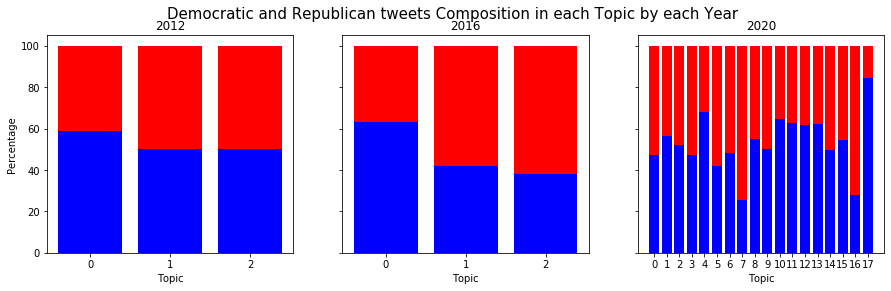

In [284]:
# Plot party distribution in each topic by year
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15, 4))
fig.suptitle('Democratic and Republican tweets Composition in each Topic by each Year', fontsize = 15)

# 2012
tix = np.arange(3)
ax1.bar(tix, report2012['D%'].values, color = 'blue')
ax1.bar(tix, report2012['R%'].values, bottom = report2012['D%'].values, color = 'red')
ax1.set_title('2012')
ax1.set_xticks(tix)
ax1.set_xlabel('Topic')
ax1.set_ylabel('Percentage')

# 2012
tix = np.arange(3)
ax2.bar(tix, report2016['D%'].values, color = 'blue')
ax2.bar(tix, report2016['R%'].values, bottom = report2016['D%'].values, color = 'red')
ax2.set_title('2016')
ax2.set_xticks(tix)
ax2.set_xlabel('Topic')

# 2020
tix = np.arange(18)
ax3.bar(tix, report2020['D%'].values, color = 'blue')
ax3.bar(tix, report2020['R%'].values, bottom = report2020['D%'].values, color = 'red')
ax3.set_title('2020')
ax3.set_xticks(tix)
ax3.set_xlabel('Topic')

plt.show()

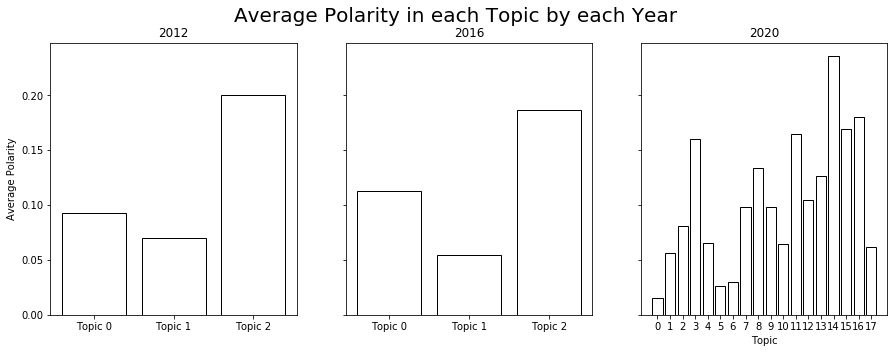

In [302]:
# Plot average polarity in each topic by year
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15, 5))
fig.suptitle('Average Polarity in each Topic by each Year', fontsize = 20)

# 2012
tix = np.arange(3)
ax1.bar(tix, report2012['PolarityMean'].values, color = 'white', edgecolor = 'k',
        tick_label = report2012.index.values)
ax1.set_title('2012')
ax1.set_ylabel('Average Polarity')

# 2012
tix = np.arange(3)
ax2.bar(tix, report2016['PolarityMean'].values, color = 'white', edgecolor = 'k',
        tick_label = report2016.index.values)
ax2.set_title('2016')

# 2020
tix = np.arange(18)
ax3.bar(tix, report2020['PolarityMean'].values, color = 'white', edgecolor = 'k')
ax3.set_title('2020')
ax3.set_xticks(tix)
ax3.set_xlabel('Topic')

plt.show()

## LDA visualization by pyLDAvis

In [295]:
pyLDAvis2012 = pyLDAvis.sklearn.prepare(lda_mod2012, vec_counts[ind2012] , vec)

In [298]:
pyLDAvis2016 = pyLDAvis.sklearn.prepare(lda_mod2016, vec_counts[ind2016] , vec)

In [299]:
pyLDAvis2020 = pyLDAvis.sklearn.prepare(lda_mod2020, vec_counts[ind2020] , vec) 

In [296]:
pyLDAvis.enable_notebook()

In [297]:
pyLDAvis.display(pyLDAvis2012)

In [300]:
pyLDAvis.display(pyLDAvis2016)

In [301]:
pyLDAvis.display(pyLDAvis2020)

# DO NOT RUN BELOW CODE

In [ ]:
# Prepare LDA visualization
    # pyLDAvis.sklearn.prepare(lda model, vectorized sparse matrix, vectorizer)
    # vectorizer is the vectorizer fit (not transform yet)
pyLDAvis_train = pyLDAvis.sklearn.prepare(lda_mod, traincounts, vec) 

# Save LDA into a html
# pyLDAvis.save_html(pyLDAvis_train, 'trainingLDAvis.html')

# Enable pyLDAvis in jupyter notebook 
pyLDAvis.enable_notebook()

# Display pyLDAvis
pyLDAvis.display(pyLDAvis_train)